#### Objective: To understand what makes the best apps in the playstore and increase visibility in the appstore

In [16]:
#importing the libraries
import pandas as pd
import numpy as np

In [17]:

df = pd.read_csv("googleplaystore_v2.csv")
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [18]:
df.shape

(10841, 13)

### Data Cleaning

In [19]:
df.info

<bound method DataFrame.info of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE

#### Checking for missing values

In [20]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [21]:
df=df.dropna()   #Dropping Null Values

In [12]:
df.shape

(9360, 13)

In [22]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [23]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

#### Checking the most common version

In [29]:
df['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    194
1.2                    126
1.3                    120
                      ... 
V1.7.6                   1
1.1.4.1296               1
2.2.1335                 1
2.05                     1
10.7.1388                1
Name: Current Ver, Length: 2638, dtype: int64

### Checking Datatypes of all columns

In [28]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

#### Checking the different apps that fall into different prices

In [22]:
df.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
$3.99        58
$1.49        31
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$7.99         7
$3.49         7
$29.99        6
$12.99        5
$24.99        5
$11.99        5
$19.99        5
$8.99         4
$10.00        3
$16.99        3
$5.49         3
$9.00         2
$7.49         2
$17.99        2
$1.00         2
$3.95         2
           ... 
$1.61         1
$4.77         1
$15.99        1
$3.28         1
$2.56         1
$18.99        1
$4.84         1
$2.95         1
$400.00       1
$3.90         1
$15.46        1
$6.49         1
$13.99        1
$3.02         1
$1.20         1
$1.76         1
$3.88         1
$379.99       1
$37.99        1
$39.99        1
$2.50         1
$1.29         1
$4.29         1
$2.90         1
$1.97         1
$299.99       1
$19.40        1
$2.00         1
$4.60         1
$1.59         1
Name: Price, Length: 73,

In [30]:
# Removing $ sign from the price and making into a float type
df.Price = df.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

C:\Users\Srikar\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
#Verify the dtype of Price once again
df.Price.dtype

dtype('float64')

In [33]:
# Checking the review column
df.Reviews.dtype



dtype('O')

We observe that the review column which is a numeric type is an object data type

In [26]:
#Changing it into a integer type
df.Reviews = df.Reviews.astype("int32")

#Checking the quantitative spread of this dataframe
df.Reviews.describe()


count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

#### Analyzing the installs column

In [34]:
#Analyse the Installs Column
df.Installs.head()


0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

Converting the installs columns into float format from object

In [35]:
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))
type(clean_installs("3,000+"))
df.Installs = df.Installs.apply(clean_installs)
df.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

We can observe below that the number of reviews is more than the number of installs which cant be true.

In [32]:
df = df[df.Reviews <= df.Installs]

In [39]:
#perform the sanity checks on prices of free apps 
df[(df.Type == "Free") & (df.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


All apps that are labeled as 'free' are priced at 0

#### Outliers Analysis Using Boxplot

In [40]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

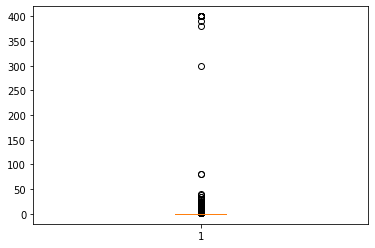

In [41]:
#Creating a box plot for the price column
plt.boxplot(df.Price)
plt.show()

In [42]:
#Checking the apps with price more than 200
df[df.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [43]:
#Cleaning the Price column
df = df[df.Price < 200]

In [44]:
df.Price.describe()

count    9345.000000
mean        0.334693
std         2.169924
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

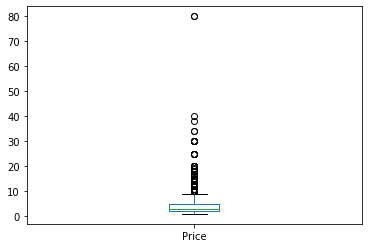

In [45]:
#Creating a box plot for paid apps

df[df.Price>0].Price.plot.box()
plt.show()

In [46]:
#Checking the apps with price more than 30
df[df.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [41]:
#Cleaning the Price column again
df = df[df.Price <= 30]
df.shape

(9338, 13)

We observe that the outliers were caused by unknown entries such as 'I am rich'. By removing them, we have observed that the outliers have reduced and we have cleaned the price column

## Analysis

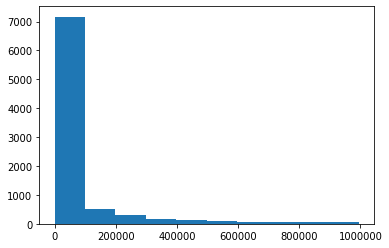

In [46]:
plt.hist(df.Reviews)
plt.show()

**Plotting a boxplot for number of installs**

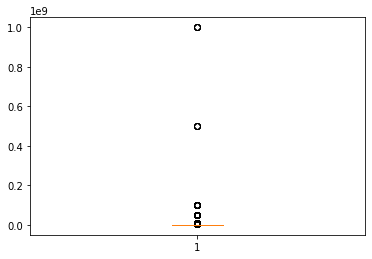

In [47]:
plt.boxplot(df.Installs)
plt.show()

In [47]:
df.Installs.describe()

count    9.345000e+03
mean     1.793747e+07
std      9.133677e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [48]:
df = df[df.Installs <= 100000000]
df.shape

(9215, 13)

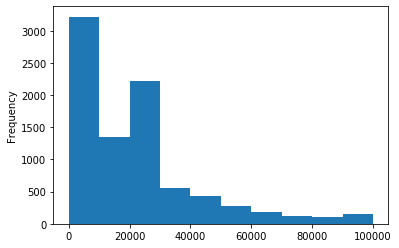

In [50]:
df.Size.plot.hist()
plt.show()

In [52]:
df.Size.describe()

count      8624.000000
mean      21634.926354
std       20668.248638
min           8.500000
25%        6000.000000
50%       18000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

**Boxplot for Size of App** 

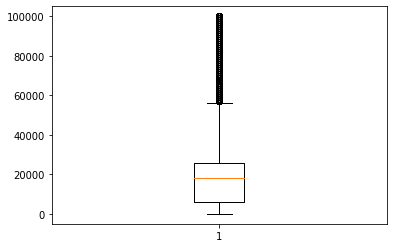

In [51]:
plt.boxplot(df.Size)
plt.show()

In [53]:
#import the necessary libraries
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

**Distribution of app rating**

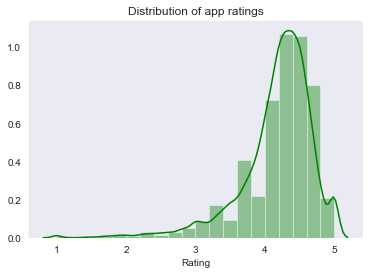

In [59]:
sns.set_style("dark")
sns.distplot(df.Rating, bins=20, color="g")
plt.title("Distribution of app ratings", fontsize=12)
plt.show()

Most apps lie between 4 and 4.5 star rating

In [70]:
#Analysing the Content Rating column
df['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [71]:
#Removing the rows with values which are less represented 
df = df[~df['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [72]:
df.shape

(8620, 13)

In [73]:
#Reset the index
df.reset_index(inplace=True, drop=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8620 entries, 0 to 8619
Data columns (total 13 columns):
App               8620 non-null object
Category          8620 non-null object
Rating            8620 non-null float64
Reviews           8620 non-null int32
Size              8620 non-null float64
Installs          8620 non-null int64
Type              8620 non-null object
Price             8620 non-null float64
Content Rating    8620 non-null object
Genres            8620 non-null object
Last Updated      8620 non-null object
Current Ver       8620 non-null object
Android Ver       8620 non-null object
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 841.9+ KB


In [75]:
#Check the apps belonging to different categories of Content Rating 
df['Content Rating'].value_counts()

Everyone        6938
Teen             928
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

Most apps that are created are for everyone, teen and mature 17+

**Content Rating**

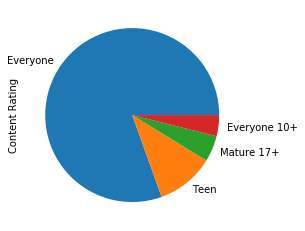

In [76]:
#Plot a pie chart
df['Content Rating'].value_counts().plot.pie()
plt.show()

**Content Rating (barplot)**

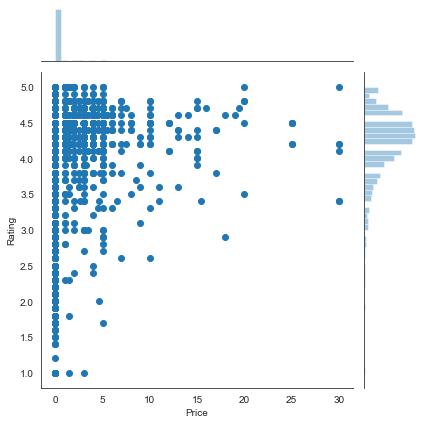

In [85]:
## Plot a jointplot for Price and Rating
sns.jointplot(df.Price, df.Rating)
plt.show()

We observe that the apps that are free are mostly reviewed and rated. Apps that are below 5 dollars are highly rated. A very few apps that are above 10 dollars are rated but all of them are rated above 1.5 stars

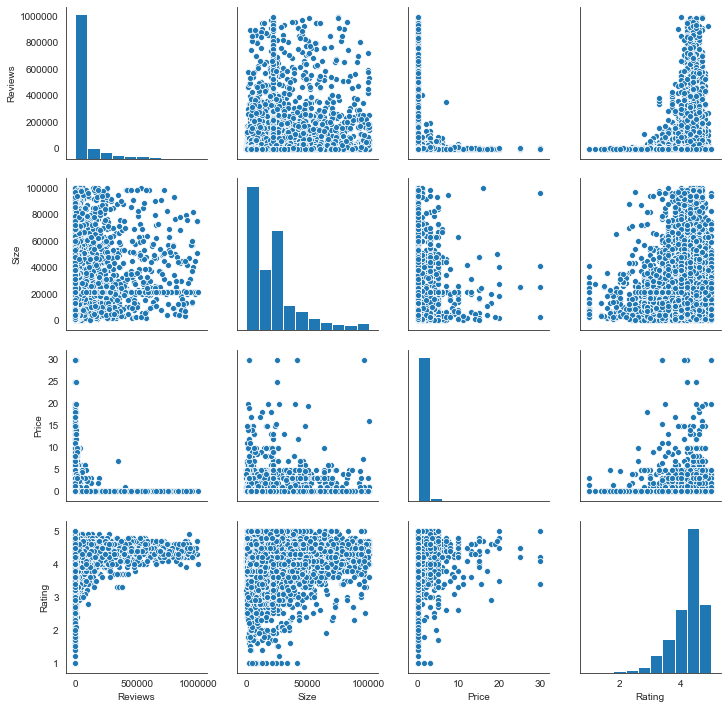

In [91]:
sns.pairplot(df[['Reviews', 'Size', 'Price','Rating']])
plt.show()

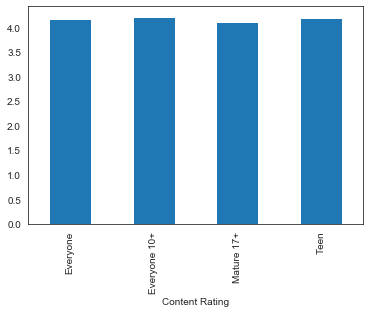

In [92]:
##Ploting a bar plot of Content Rating vs Average Rating 
df.groupby(['Content Rating'])['Rating'].mean().plot.bar()

### Content Rating vs Rating

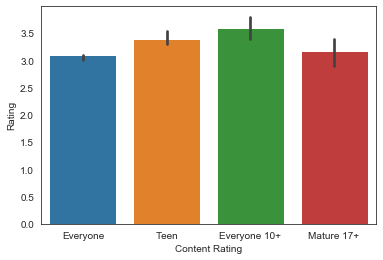

In [99]:
sns.barplot(data=df, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

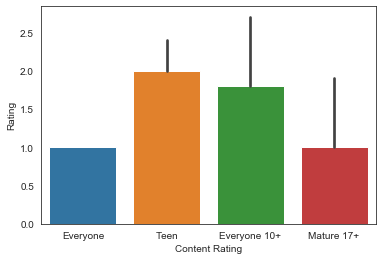

In [100]:
sns.barplot(data=df, x="Content Rating", y="Rating", estimator=np.min)
plt.show()

Most apps that are for everyone get reviewed and rated the most.

### Category Analysis

In [34]:
inp1['Category'].value_counts().head()

FAMILY          1747
GAME            1093
TOOLS            734
PRODUCTIVITY     351
MEDICAL          349
Name: Category, dtype: int64

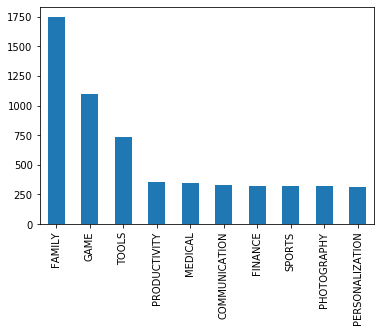

In [41]:
inp1['Category'].value_counts().head(10).plot.bar()


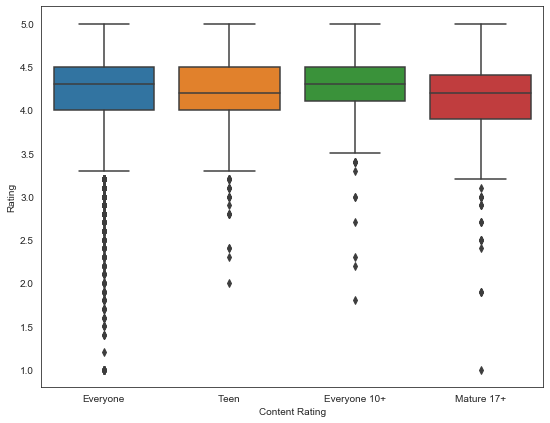

In [101]:
##Ploting a box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(df['Content Rating'], df.Rating)
plt.show()

In [103]:
#Plotting a box plot of Ratings across the 4 most popular Genres
df['Genres'].value_counts()

Tools                                  694
Entertainment                          508
Education                              464
Medical                                344
Finance                                315
Productivity                           310
Sports                                 310
Lifestyle                              303
Business                               298
Personalization                        295
Health & Fitness                       290
Action                                 273
Photography                            267
Communication                          249
News & Magazines                       223
Shopping                               214
Social                                 212
Travel & Local                         210
Dating                                 195
Simulation                             188
Books & Reference                      174
Arcade                                 156
Video Players & Editors                143
Casual     

In [104]:
c = ['Tools','Entertainment','Medical','Education']
inp5= df[df['Genres'].isin(c)]

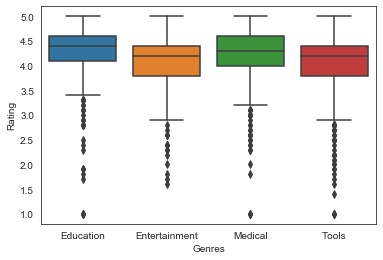

In [105]:
sns.boxplot(inp5['Genres'],df.Rating)

In [106]:
##Ratings vs Size vs Content Rating


df['Size_Bucket'] = pd.qcut(df.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [108]:
##Creating a pivot table for Size_buckets and Content Rating with values set to Rating
df.head()
pd.pivot_table(data=df, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


In [109]:
##Change the aggregation to median
pd.pivot_table(data=df, index="Content Rating", columns="Size_Bucket", values="Rating", aggfunc=np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.25,4.2,4.1,4.1,4.2
Teen,4.20,4.3,4.2,4.2,4.3


In [110]:
##Changing the aggregation to 20th percentile
pd.pivot_table(data=df,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [111]:
##Storing the pivot table in a separate variable
res = pd.pivot_table(data=df,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.2))

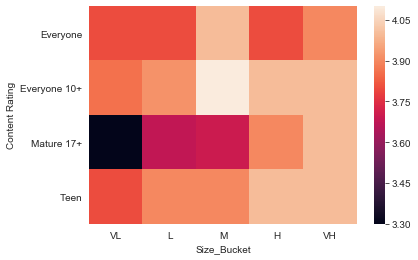

In [112]:
##Plotting a heat map
sns.heatmap(res)
plt.show()

In [115]:
## Extracting the month from the Last Updated Date
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [116]:
df['updated_month'] = pd.to_datetime(df['Last Updated']).dt.month

In [117]:
## Find the average Rating across all the months
df.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

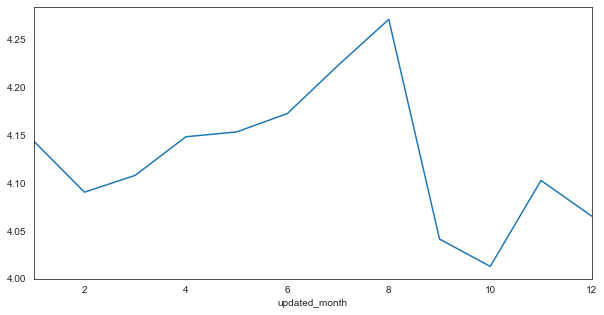

In [118]:
## Plot a line graph
plt.figure(figsize=[10,5])
df.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

**Most apps that are created and updated in the month of July, august and september**

In [119]:
## Creating a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=df, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


In [120]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=df, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

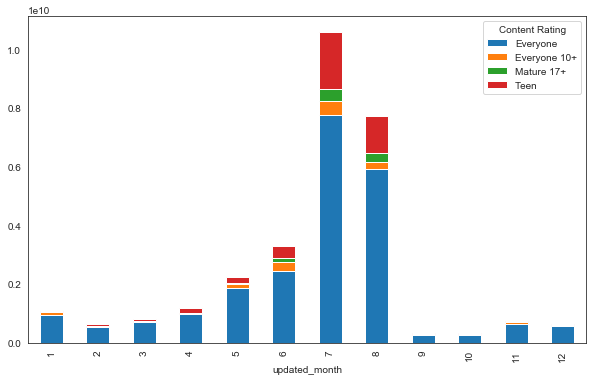

In [121]:
##Plot the stacked bar chart.
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

### Conclusion

- Most apps that are highly reviewed are for Everyone followed by Teen and Mature 17. This tells us about the age range of users.  <br><br>

- Most apps that are used, and reviewed high are free or below 5 dollars.<br><br>

- Most apps that are highly rated are made for android 4.1 and up <br><br>

- Most apps that are highly rated are from Tools,Entertainment,Education, medical, finance Genre<br><br>

- Most apps that are highly rated come under the category    family,games,tools,productivity and medical<br><br>

- Most apps that are updated and released are in the month of August and september
